<a href="https://colab.research.google.com/github/joaoeliandro/prediction_linear_regression/blob/main/src/prediction_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libs

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt

Download dataset

In [2]:
!pip3 install wget
!wget https://raw.githubusercontent.com/diogocortiz/Curso-IA-para-todos/master/RegressaoLinear/FuelConsumptionCo2.csv

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=9e59369a7266cdcbc3faa1dbe841edaf7bad66d9aa9d5204798cc815e40f4f87
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
--2021-12-04 01:56:11--  https://raw.githubusercontent.com/diogocortiz/Curso-IA-para-todos/master/RegressaoLinear/FuelConsumptionCo2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/plain]
Saving to: ‘FuelConsumptionCo2.csv’

FuelConsumptionCo2. 100%[===================>]  70.93K  --.-KB/s    in 0.002s  

2021-12-04 01:56:11 (39.6 MB/s) - ‘FuelConsumptionCo2.csv’ saved [72629/72629]



Load the dataset to dataframe 

In [4]:
df = pd.read_csv('FuelConsumptionCo2.csv')
print(df.head())

   MODELYEAR   MAKE  ... FUELCONSUMPTION_COMB_MPG CO2EMISSIONS
0       2014  ACURA  ...                       33          196
1       2014  ACURA  ...                       29          221
2       2014  ACURA  ...                       48          136
3       2014  ACURA  ...                       25          255
4       2014  ACURA  ...                       27          244

[5 rows x 13 columns]


Select features

In [7]:
motors = df[['ENGINESIZE']]
co2 = df[['CO2EMISSIONS']]

print(motors.head())

   ENGINESIZE
0         2.0
1         2.4
2         1.5
3         3.5
4         3.5


Separation dataset test and dataset train

In [8]:
motors_train, motors_test, co2_train, co2_test = train_test_split(motors, co2, test_size=0.2, random_state=42)
print(type(motors_train))

<class 'pandas.core.frame.DataFrame'>


Plot correlation features

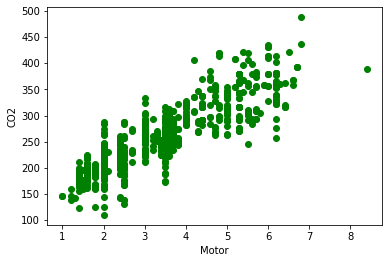

In [11]:
plt.scatter(motors_train, co2_train, color='green')
plt.xlabel('Motor')
plt.ylabel('CO2')
plt.show()

Train model

In [16]:
model = linear_model.LinearRegression()

model.fit(motors_train, co2_train)

LinearRegression()

Show coefficient

In [17]:
print('A: ', model.intercept_)
print('B: ', model.coef_)

A:  [126.28970217]
B:  [[38.99297872]]


Plot straight and correlation (Dataset train)

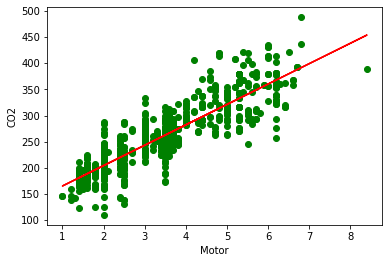

In [21]:
plt.scatter(motors_train, co2_train, color='green')
plt.plot(motors_train, model.coef_[0][0] * motors_train + model.intercept_[0], '-r')
plt.xlabel('Motor')
plt.ylabel('CO2')
plt.show()

Model prediction

In [19]:
predictionsCo2 = model.predict(motors_test)

Plot straight and correlation (Dataset test)

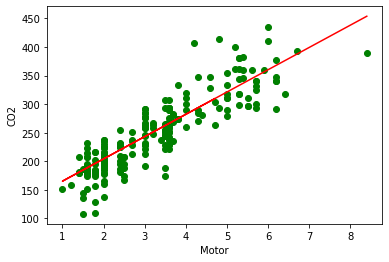

In [18]:
plt.scatter(motors_test, co2_test, color='green')
plt.plot(motors_test, model.coef_[0][0] * motors_test + model.intercept_[0], '-r')
plt.xlabel('Motor')
plt.ylabel('CO2')
plt.show()

Model analyze

In [22]:
print("Sum of squares of errors (SSE): %.2f " % np.sum((predictionsCo2 - co2_test)**2))
print("Mean squared error (MSE): %.2f" % mean_squared_error(co2_test, predictionsCo2))
print("Mean absolute error (MAE): %.2f" % mean_absolute_error(co2_test, predictionsCo2))
print ("Root Mean Squared Error (RMSE): %.2f " % sqrt(mean_squared_error(co2_test, predictionsCo2)))
print("R2-score: %.2f" % r2_score(co2_test, predictionsCo2) )

Sum of squares of errors (SSE): 210990.77 
Mean squared error (MSE): 985.94
Mean absolute error (MAE): 24.10
Root Mean Squared Error (RMSE): 31.40 
R2-score: 0.76
